In [28]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from internet using panda
#from pandas.io.data import DataReader
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [34]:
techList = ['F','GOOG','MSFT','AMZN']

In [35]:
end = datetime.now()

In [36]:
start = datetime(end.year-1,end.month,end.day)

In [37]:
for stock in techList:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [38]:
F.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-23,16.469999,16.740000,16.459999,16.570000,30709000,15.560698
2015-03-24,16.580000,16.690001,16.469999,16.559999,16661800,15.551306
2015-03-25,16.530001,16.549999,16.180000,16.180000,21996200,15.194454
2015-03-26,16.110001,16.170000,15.960000,16.010000,33327900,15.034808
2015-03-27,16.059999,16.100000,15.850000,15.980000,53270400,15.006635


In [39]:
F.describe()
#summary
#adj.close is the adjusted clsosing price

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,14.328340,14.452174,14.152095,14.306719,3.114378e+07,13.747716
std,1.223287,1.197264,1.281656,1.219934,1.356257e+07,0.983032
min,11.170000,11.430000,10.440000,11.170000,7.760600e+06,11.170000
25%,13.660000,13.790000,13.470000,13.640000,2.189210e+07,13.230000
50%,14.540000,14.680000,14.400000,14.550000,2.786030e+07,13.925272
75%,15.210000,15.300000,15.100000,15.200000,3.722900e+07,14.460189
max,16.580000,16.740000,16.469999,16.570000,1.021747e+08,15.560698


In [40]:
F.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-23 to 2016-03-22
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


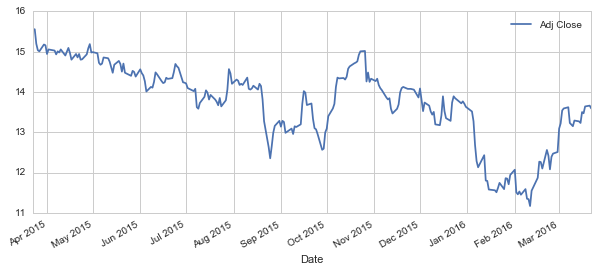

In [41]:
# basic analysis of historical closing price
F['Adj Close'].plot(legend= True,figsize =(10,4))

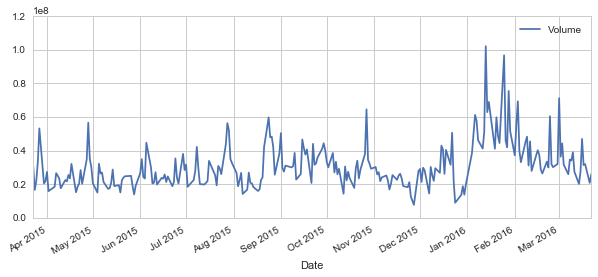

In [42]:
# total volume of stock traded 
F['Volume'].plot(legend = True,figsize = (10,4))

In [43]:
# calculate the moving average
url = 'http://www.investopedia.com/terms/m/movingaverage.asp'
url = ' http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp'

In [45]:
#For F stock
#Several Moving Averages#
maDay = [10,20,50]
for ma in maDay :
    columnName = "MA for %s days" %(str(ma))
    F[columnName] = pd.rolling_mean(F['Adj Close'],ma)
    

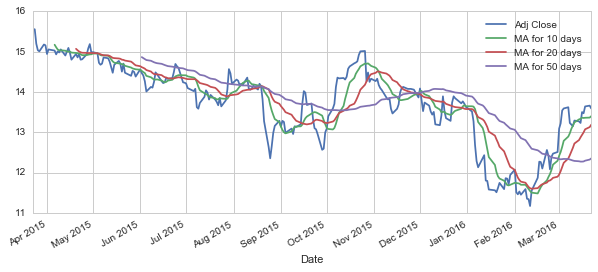

In [46]:
F[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize =(10,4))
#pass a list of column names

In [47]:
#daily returns and risk of the stock
#daily changes of the stock
F['Daily Return'] = F['Adj Close'].pct_change() # percent change method is an inbulit method

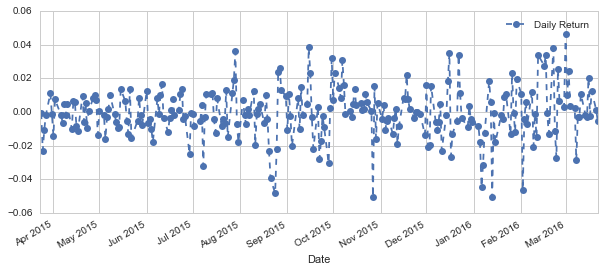

In [48]:
F['Daily Return'].plot(figsize =(10,4),legend = True,linestyle='--',marker = 'o')

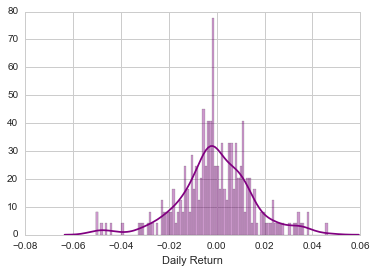

In [50]:
#displot to have two charts on each other
sns.distplot(F['Daily Return'].dropna(),bins = 100,color ='purple')

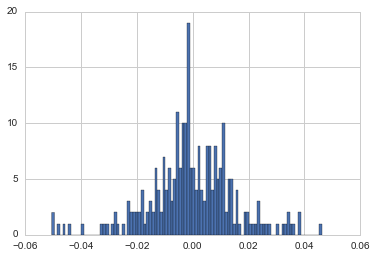

In [51]:
# another way for pandas inbuilt hist method
F['Daily Return'].hist(bins=100)

In [52]:
#analyze all the stocks
closingDf = web.DataReader(techList,'yahoo',start,end)['Adj Close']


In [53]:
closingDf.head()

,AMZN,F,GOOG,MSFT
Date,,,,
2015-03-23,375.109985,15.560698,558.812510,41.721493
2015-03-24,374.089996,15.551306,570.192597,41.760431
2015-03-25,370.959991,15.194454,558.787539,40.358680
2015-03-26,367.350006,15.034808,555.172522,40.115321
2015-03-27,370.559998,15.006635,548.342512,39.881698


In [54]:
# daily return for all the stocks
techRets = closingDf.pct_change()

In [55]:
techRets.head()

,AMZN,F,GOOG,MSFT
Date,,,,
2015-03-23,NaN,NaN,NaN,NaN
2015-03-24,-0.002719,-0.000604,0.020365,0.000933
2015-03-25,-0.008367,-0.022947,-0.020002,-0.033566
2015-03-26,-0.009731,-0.010507,-0.006469,-0.006030
2015-03-27,0.008738,-0.001874,-0.012303,-0.005824


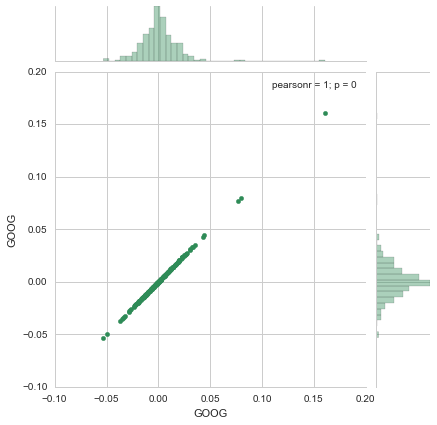

In [56]:
#copare the two stocks for daily return
#compare google to itself
sns.jointplot('GOOG','GOOG',techRets,kind = 'scatter',color = 'seagreen')
# linear because it is comparing to itself. postive linear relation

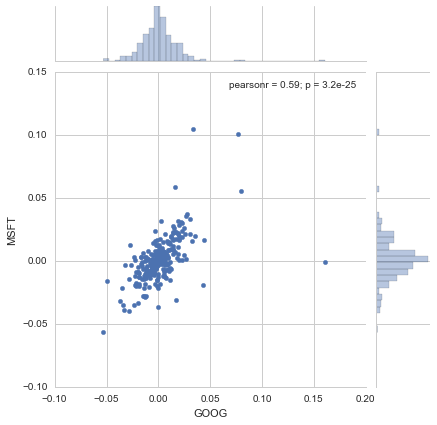

In [58]:
sns.jointplot('GOOG','MSFT',techRets,kind = 'scatter')

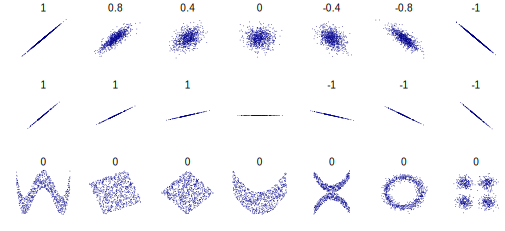

In [62]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

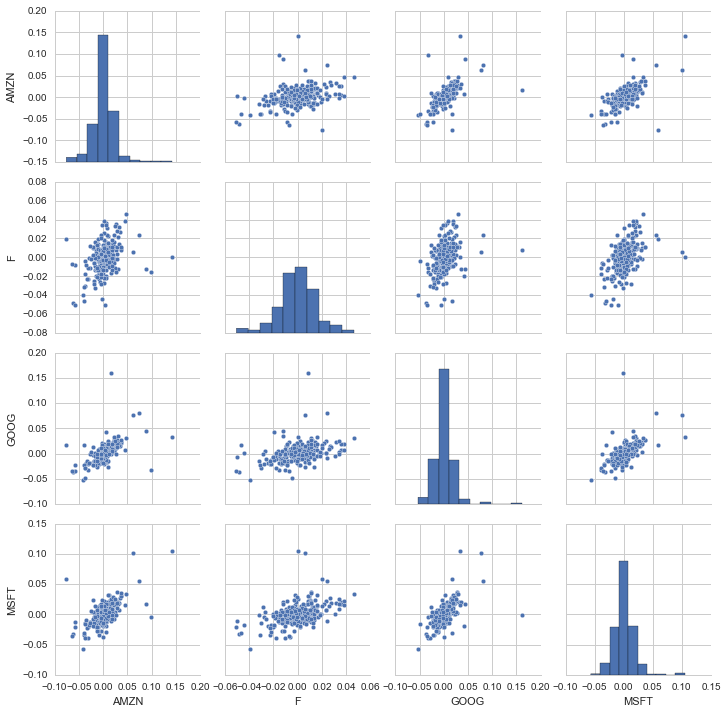

In [67]:
#simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(techRets.dropna())
# easy to make a comparison analysis plot

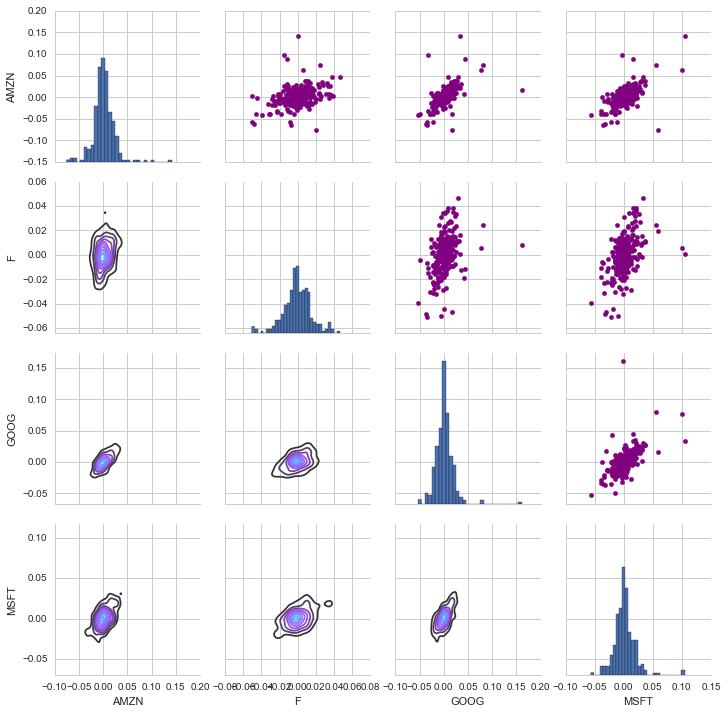

In [69]:
#sns.pairgrid for more detailed for more control
returnsFig = sns.PairGrid(techRets.dropna())
# plt. scatter plot
returnsFig.map_upper(plt.scatter,color ='purple')
#for lower kde plots
returnsFig.map_lower(sns.kdeplot,cmap ='cool_d')
#define the diagnol
returnsFig.map_diag(plt.hist,bins = 30)

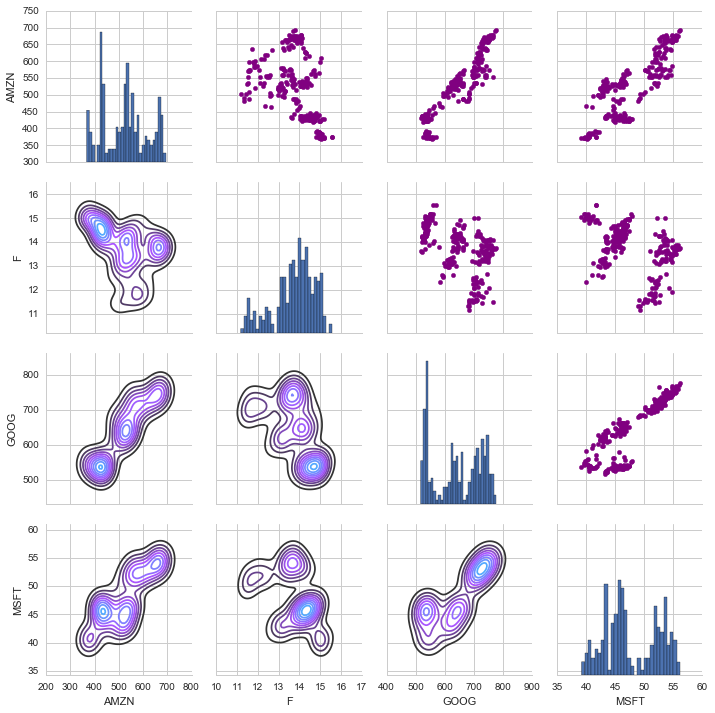

In [70]:
#analyze the correlation of closing prices
#sns.pairgrid for more detailed for more control
returnsFig = sns.PairGrid(closingDf)
# plt. scatter plot
returnsFig.map_upper(plt.scatter,color ='purple')
#for lower kde plots
returnsFig.map_lower(sns.kdeplot,cmap ='cool_d')
#define the diagnol
returnsFig.map_diag(plt.hist,bins = 30)


C:\Users\piush\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\piush\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


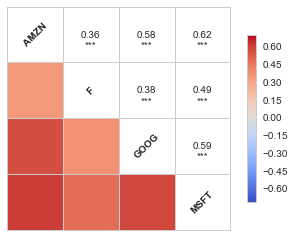

In [71]:
# actual values of correlation value
sns.corrplot(techRets.dropna(),annot = True)

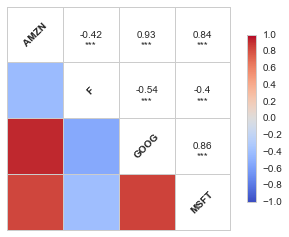

In [72]:
sns.corrplot(closingDf,annot = True)

In [73]:
# Risk analysis
rets = techRets.dropna()

In [74]:
#define the area of scatter plot
area = np.pi* 20

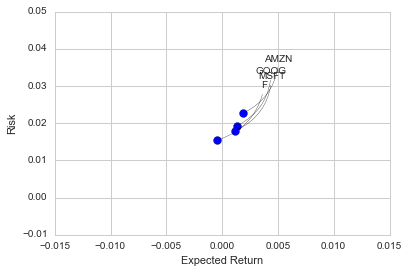

In [75]:
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [79]:
#bootstrap method with quantiles
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

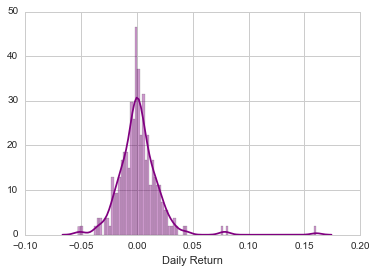

In [81]:
sns.distplot(GOOG['Daily Return'].dropna(),bins = 100,color='purple')

In [82]:
#pandas has quantile built into it
rets.head()

,AMZN,F,GOOG,MSFT
Date,,,,
2015-03-24,-0.002719,-0.000604,0.020365,0.000933
2015-03-25,-0.008367,-0.022947,-0.020002,-0.033566
2015-03-26,-0.009731,-0.010507,-0.006469,-0.006030
2015-03-27,0.008738,-0.001874,-0.012303,-0.005824
2015-03-30,0.010875,0.011264,0.006729,-0.000244


In [83]:
rets['GOOG'].quantile(0.05)
# the empirical count, 5  percent variance or 95% confidence 

-0.022776446993332249

In [86]:
#Monte Carlo Mehod
#few simulations
days = 365
dt = 1/days
mu = rets.mean()['GOOG'] # associated with the drift
# volatility of the stock or shock
sigma = rets.std()['GOOG']

In [87]:
def stockMonteCarlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] *(drift[x] + shock[x]))
    return price

In [88]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2015-03-23,560.432554,562.362529,555.832536,558.812510,1643800,558.812510,NaN
2015-03-24,562.562541,574.592603,561.212525,570.192597,2583200,570.192597,0.020365
2015-03-25,570.502590,572.262605,558.742555,558.787539,2152200,558.787539,-0.020002
2015-03-26,557.592550,558.902540,550.652497,555.172522,1572600,555.172522,-0.006469
2015-03-27,553.002509,555.282504,548.132463,548.342512,1897400,548.342512,-0.012303


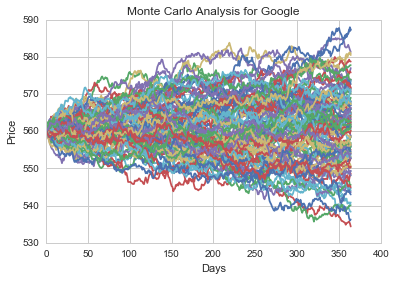

In [90]:
start_price = 560.432

for run in xrange(100):
    plt.plot(stockMonteCarlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [93]:
#create a histogram of the plot
runs = 10000
simulations = np.zeros(runs)
for run in xrange(runs):
    #every simulation si defined by 10000 runs
    simulations[run]= stockMonteCarlo(start_price,days,mu,sigma)[days - 1]

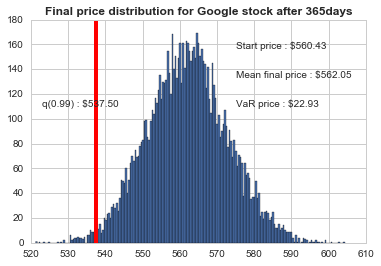

In [96]:
q = np.percentile(simulations,1)
# 99 percent of the value should fit into the program
plt.hist(simulations,bins= 200)
plt.figtext(0.6,0.8, s= "Start price : $%.2f" %start_price)
plt.figtext(0.6,0.7, "Mean final price : $%.2f" %simulations.mean())
plt.figtext(0.6,0.6, "VaR price : $%.2f" %(start_price - q,))
plt.figtext(0.15,0.6, "q(0.99) : $%.2f" %q)
plt.axvline(x = q,linewidth = 4,color ='r')
plt.title(u"Final price distribution for Google stock after %sdays" %days,weight = 'bold')
